In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
# VAE Architecture Definition
class VAE (nn.Module):
  def __init__(self, input_dim=784, hidden_dim=256, latent_dim=20):
    super (VAE, self).__init__()
    # Encoder layers
    self.fc1=nn.Linear (input_dim, hidden_dim)
    self.fc_mu= nn.Linear (hidden_dim, latent_dim)# Mean for the latent distribution
    self.fc_logvar= nn.Linear(hidden_dim, latent_dim)    # Log variance for the latent distribution.

    # Decoder layers
    self.fc2 = nn. Linear (latent_dim, hidden_dim)
    self.fc3 = nn. Linear (hidden_dim, input_dim)
  def encoder(self, x):
    h = torch.relu(self.fc1(x))
    mu =self.fc_mu(h)
    log_var =self.fc_logvar(h)
    return mu, log_var
  def reparameterize(self, mu, log_var):
    std= torch.exp(0.5 *log_var)
    eps = torch.randn_like(std)
    return mu + eps * std

  def decoder(self, z):
    h = torch.relu(self.fc2(z))
    return torch.sigmoid(self.fc3(h))

  def forward(self, x):
    mu, log_var = self.encoder(x)
    z = self.reparameterize (mu, log_var)
    return self.decoder(z), mu, log_var



In [ ]:
#VAE Loss Function
def vae_loss (recon_x, x, mu, log_var):
  # Reconstruction Loss (Binary Cross-Entropy)
  recon_loss= nn.functional.binary_cross_entropy (recon_x, x, reduction='sum')
  # KL Divergence Loss
  kl_div = -0.5 *torch.sum(1+log_var- mu.pow(2) - log_var.exp())
  return recon_loss + kl_div

In [ ]:
# Data Preparation
transform = transforms.Compose ([transforms. ToTensor(), transforms. Lambda (lambda x: x.view(-1))])
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader =torch.utils.data.DataLoader (train_data, batch_size=64, shuffle=True)
# Model, Optimizer
latent_dim = 20
model =VAE(latent_dim=latent_dim)
optimizer= optim. Adam (model.parameters(), lr=0.001)


In [ ]:
# Training the VAE
epochs = 50
for epoch in range(epochs):
  model.train()
  train_loss = 0
  for data,_ in train_loader:
    data= data.view(-1, 784)
    # Flatten images
    optimizer.zero_grad()
    recon_data, mu, log_var = model (data)
    loss= vae_loss(recon_data, data, mu, log_var)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
  print(f'Epoch {epoch+1}/{epochs}, Loss: {train_loss/len(train_loader.dataset):.4f}')

Epoch 1/50, Loss: 154.3301
Epoch 2/50, Loss: 119.7286
Epoch 3/50, Loss: 114.1350
Epoch 4/50, Loss: 111.5516
Epoch 5/50, Loss: 110.0411
Epoch 6/50, Loss: 109.0801
Epoch 7/50, Loss: 108.3871
Epoch 8/50, Loss: 107.7546
Epoch 9/50, Loss: 107.3326
Epoch 10/50, Loss: 106.9474
Epoch 11/50, Loss: 106.5931
Epoch 12/50, Loss: 106.3828
Epoch 13/50, Loss: 106.1299
Epoch 14/50, Loss: 105.9361
Epoch 15/50, Loss: 105.7592
Epoch 16/50, Loss: 105.5747
Epoch 17/50, Loss: 105.4047
Epoch 18/50, Loss: 105.2927
Epoch 19/50, Loss: 105.1496
Epoch 20/50, Loss: 104.9996
Epoch 21/50, Loss: 104.9161
Epoch 22/50, Loss: 104.7726
Epoch 23/50, Loss: 104.7042
Epoch 24/50, Loss: 104.5920
Epoch 25/50, Loss: 104.5061
Epoch 26/50, Loss: 104.4102
Epoch 27/50, Loss: 104.3637
Epoch 28/50, Loss: 104.2309
Epoch 29/50, Loss: 104.2137
Epoch 30/50, Loss: 104.1473
Epoch 31/50, Loss: 104.0116
Epoch 32/50, Loss: 103.9587
Epoch 33/50, Loss: 103.9286
Epoch 34/50, Loss: 103.8536
Epoch 35/50, Loss: 103.7899
Epoch 36/50, Loss: 103.7454
E

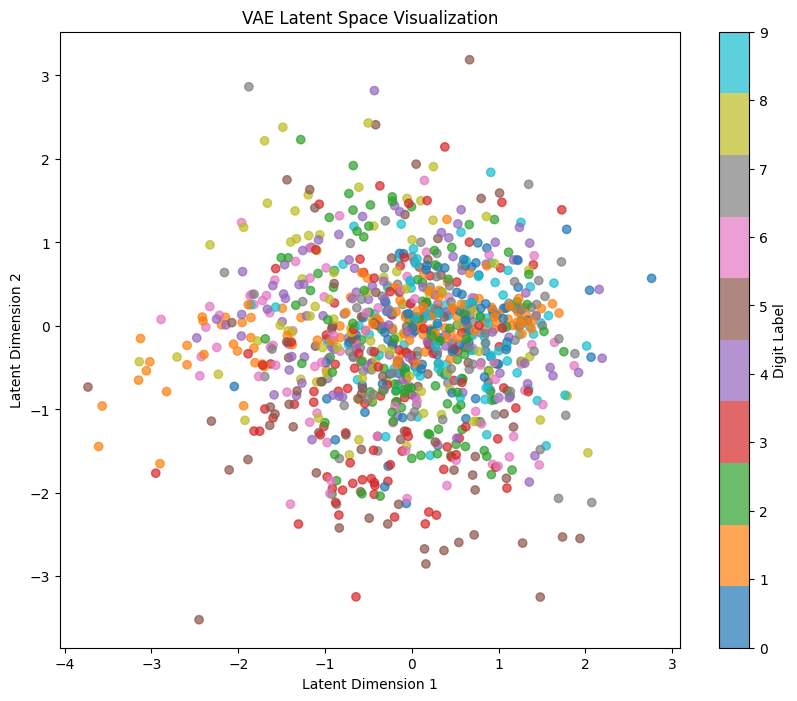

In [ ]:
# Extract latent variables for a subset of the test set
test_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader =torch.utils.data.DataLoader (test_data, batch_size=1000, shuffle=False)
data,labels = next(iter (test_loader))
data =data.view(-1, 784)
# Pass data through encoder
model.eval()
with torch.no_grad():
  mu,_ =model.encoder(data)

# Plot the latent space with class labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter (mu[:, 8].numpy(), mu[:, 1].numpy(), c=labels, cmap='tab10', alpha=0.7)
plt.colorbar (scatter, label='Digit Label')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('VAE Latent Space Visualization')
plt.show()

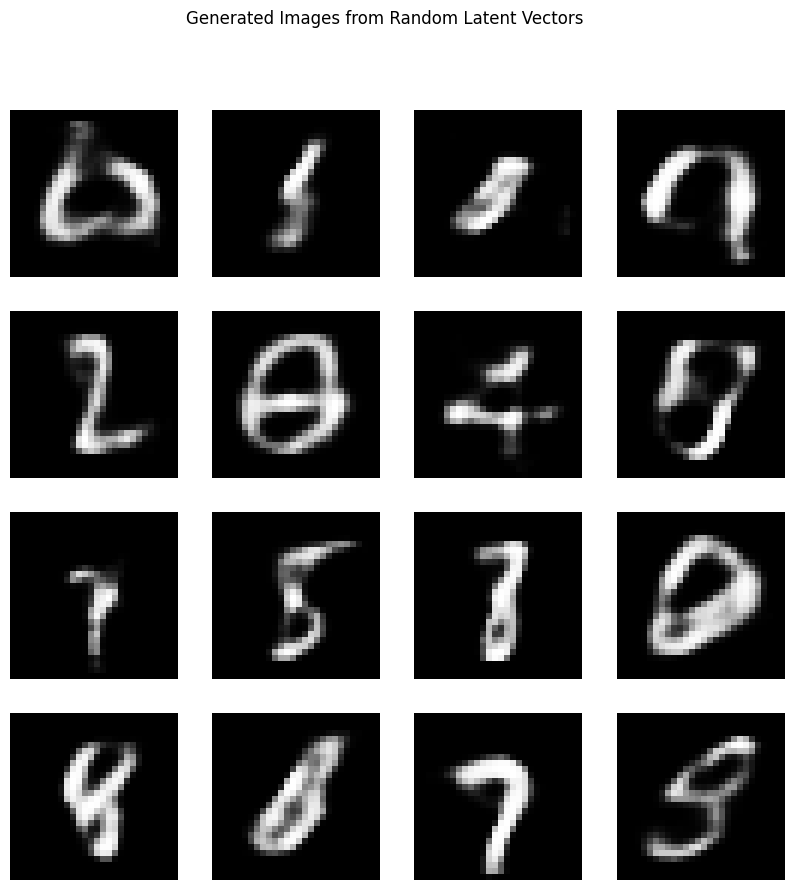

In [ ]:
# Generate new images by sampling from the latent space
with torch.no_grad():
  z = torch.randn (16, latent_dim) # Sample from standard normal distribution
  generated_images= model.decoder(z).view(-1, 1, 28, 28)
#Visualize generated images
plt.figure(figsize=(10, 10))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(generated_images[i].squeeze (0), cmap='gray')
  plt.axis('off')
plt.suptitle("Generated Images from Random Latent Vectors")
plt.show()

In [ ]:
"--------------------------------------------------------------------------------------------------------------------------------------------------------------------"